# FINTECH BOOTCAMP - PROJECT 2
## Group 2 Notebook
---
By applying machine learning models, we examine (1) if selective technical indicators could predict the stock direction with statistically significant level (2) Which model is the best (3) Whether we could optimize the model (4) Which time frame the model could generate the best result. 

In [39]:
# Initial import all libraries and dependencies
import yfinance as yf
import matplotlib.dates as mdates
import panel as pn
import datetime
import numpy as np
import pandas as pd
import hvplot.pandas
from finta import TA
# from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

# Ignore wanrings
import warnings
warnings.filterwarnings("ignore")


# Machine learning libraries
from sklearn.preprocessing import StandardScaler

### I. DATA FETCHING AND CLEANING

In [40]:
# Define the instruments to download data of a stock/ETF .
tickers = ["AAPL", "TSLA", "MSFT", "SPY", "..."] # to be decided

# Fetch SPY Data from 1/1/2017 until 12/31/2021 and choosing a interval
start_date = datetime.date(2017,1,1)
end_date = datetime.date(2021,12,31)
interval = '1d'

In [41]:
#Use pandas_reader.data.DataReader to load the desired data.
yf.Tickers(tickers[1])
panel_data = yf.download(tickers[1], start = start_date, end = end_date, interval = interval)

# Checkout the data type
type(panel_data)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [42]:
# Review data
panel_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000
2021-12-30,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300


In [43]:
# Data description and check if null
def data_description(df):
    print("Data Information")
    print(df.info())
    print("-"*50)

In [44]:
data_description(panel_data) # if 0 null and OHLC is floating and Volumne is int, then data is clean to proceed to part II

Data Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None
--------------------------------------------------


In [45]:
# IF data is not clean then dropping null or convert datatype
# def data_cleaning(df):
#     df.dropna()

In [46]:
# Convert to ohlcv dataframe to be ready for finta
def ohlcv(df):
    del(df['Adj Close'])
    df = df.rename(columns = {"Open": "open",'High' : 'high', 'Low' : "low", "Close": "close", 'Volume': 'volume'},inplace = True)
    return df

In [47]:
ohlcv(panel_data)
panel_data

,open,high,low,close,volume
Date,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500
...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,20108000


### II. DATA PROCESSING AND PREPARATION

In [48]:
# Timeframe for prediction
time_frame = [3,5,7]

# Identify stock direction
def stock_direction(df, days):# days is time frame
    direction = (df['close'].shift(-days) > df['close'])
    direction = direction.iloc[:-days]
    return direction.astype(int) #return y values

In [49]:
stock_direction(panel_data,time_frame[0]) # y values

Date
2017-01-03    1
2017-01-04    1
2017-01-05    1
2017-01-06    1
2017-01-09    0
             ..
2021-12-20    1
2021-12-21    1
2021-12-22    1
2021-12-23    1
2021-12-27    0
Name: close, Length: 1255, dtype: int64

In [50]:
# Using Finta calculate technical indicators
# Define key window to calculate for technical analysis 
window = [5,14,21,50]
def technical_indicators (df): # https://github.com/peerchemist/finta/blob/master/finta/finta.py
    for n in range(len(window)) :  ### LOOPING DOES NOT SHOW(?)
        a = TA.BBANDS(df,window[n])
        b = TA.RSI(df,window[n])
        c = TA.PIVOT_FIB(df)
        d = TA.OBV(df)
        e = TA.SMA(df,window[n])
        f = TA.EMA(df,window[n])
        g = TA.ROC(df,window[n])
        k = TA.WILLIAMS(df,window[n])
        x = pd.concat([a,b,c,d,e,g,k],axis =1)
    return x

In [51]:
technical_indicators(panel_data)

,BB_UPPER,BB_MIDDLE,BB_LOWER,50 period RSI,pivot,s1,s2,s3,s4,r1,r2,r3,r4,OBV,50 period SMA,ROC,50 Williams %R
Date,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,100.000000,43.218667,42.502799,42.060535,41.344667,40.628799,43.934536,44.376800,45.092668,45.808536,5.606750e+07,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,97.609545,44.619999,43.574083,42.927916,41.882000,40.836084,45.665915,46.312082,47.357998,48.403913,2.650900e+07,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,98.056056,45.078665,44.656174,44.395158,43.972666,43.550175,45.501157,45.762173,46.184664,46.607156,5.414850e+07,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,98.368416,45.651333,45.280029,45.050637,44.679333,44.308029,46.022637,46.252029,46.623333,46.994637,7.404600e+07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1245.722863,1037.823400,829.923936,55.755428,993.859985,971.470971,957.639014,935.250000,912.860986,1016.249000,1030.080956,1052.469971,1074.858985,4.338757e+09,1037.823400,31.552988,-41.030824
2021-12-27,1241.885600,1043.335798,844.785997,56.667460,1045.846659,1017.036226,999.237110,970.426676,941.616243,1074.657093,1092.456209,1121.266642,1150.077076,4.362472e+09,1043.335798,33.681192,-35.510767
2021-12-28,1238.546112,1048.244597,857.943082,56.426472,1093.886637,1076.207666,1065.285579,1047.606608,1029.927637,1111.565609,1122.487695,1140.166667,1157.845638,4.342364e+09,1048.244597,29.114021,-39.543904


In [52]:
def consol_data(df,days):
    consol_data = technical_indicators(df)
    consol_data["direction"] = stock_direction(df,days)
    consol_data.dropna(inplace = True)
    return consol_data

In [53]:
data = consol_data(panel_data,time_frame[0])
data

,BB_UPPER,BB_MIDDLE,BB_LOWER,50 period RSI,pivot,s1,s2,s3,s4,r1,r2,r3,r4,OBV,50 period SMA,ROC,50 Williams %R,direction
Date,,,,,,,,,,,,,,,,,,
2017-03-16,56.053166,50.356840,44.660514,59.555327,51.400000,50.885828,50.568172,50.054000,49.539827,51.914173,52.231829,52.746001,53.260173,1.888430e+08,50.356840,20.765937,-34.674332,0.0
2017-03-17,56.033042,50.494880,44.956718,59.270248,52.457334,51.946217,51.630449,51.119333,50.608216,52.968450,53.284219,53.795335,54.306452,1.563555e+08,50.494880,15.203314,-39.562965,0.0
2017-03-20,55.994756,50.635560,45.276364,59.421602,52.535334,52.219802,52.024866,51.709334,51.393802,52.850866,53.045802,53.361334,53.676867,1.744270e+08,50.635560,15.510475,-41.120452,0.0
2017-03-21,55.899448,50.722240,45.545032,53.947109,52.352666,51.914894,51.644438,51.206666,50.768894,52.790438,53.060894,53.498666,53.936438,1.398840e+08,50.722240,9.462477,-59.391679,1.0
2017-03-22,55.831613,50.817160,45.802707,55.556647,51.048000,49.935617,49.248385,48.136002,47.023618,52.160384,52.847616,53.959999,55.072383,1.601805e+08,50.817160,10.260287,-52.386361,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1260.679545,1025.710199,790.740853,49.396553,934.089986,914.371148,902.188829,882.469991,862.751153,953.808824,965.991143,985.709981,1005.428819,4.252802e+09,1025.710199,14.570525,-75.012554,1.0
2021-12-21,1255.213946,1028.642000,802.070053,50.987230,905.006673,894.196078,887.517281,876.706685,865.896090,915.817269,922.496066,933.306661,944.117256,4.276641e+09,1028.642000,18.510244,-68.235920,1.0
2021-12-22,1250.058878,1032.705000,815.351122,53.694523,921.383341,900.992180,888.394498,868.003337,847.612175,941.774503,954.372184,974.763346,995.154508,4.307853e+09,1032.705000,25.213478,-53.601703,1.0


### III. CHOOSING MODELS AND TRAINING MODEL (INDIVIDUAL WORK)

#### 1. Model 1......

#### 2. Model 2......

SVC(kernel='linear')

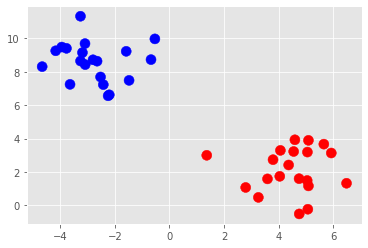

In [54]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")

from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [55]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
print(x_min, x_max, y_min, y_max)

-4.665344913694041 6.487246392154996 -0.5112914593103839 11.329633858834494


In [56]:
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491
  -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491]
 [-3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491
  -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491]
 [-2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491
  -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491]
 [-1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491
  -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491]
 [-0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491
  -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491]
 [ 0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509
   0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509]
 [ 1.33465509  1.33465509  1.33465509  1.33465509  1.33465509  1.33465509
   1.33465509  1.33465509  1.334

In [57]:
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[ 2.79983696e-01  3.25552530e-03 -2.73472645e-01 -5.50200816e-01
 -8.26928987e-01 -1.10365716e+00 -1.38038533e+00 -1.65711350e+00
 -1.93384167e+00 -2.21056984e+00 -2.48729801e+00 -2.76402618e+00
  5.60529135e-01  2.83800965e-01  7.07279384e-03 -2.69655377e-01
 -5.46383548e-01 -8.23111719e-01 -1.09983989e+00 -1.37656806e+00
 -1.65329623e+00 -1.93002440e+00 -2.20675257e+00 -2.48348074e+00
  8.41074575e-01  5.64346404e-01  2.87618233e-01  1.08900624e-02
 -2.65838108e-01 -5.42566279e-01 -8.19294450e-01 -1.09602262e+00
 -1.37275079e+00 -1.64947896e+00 -1.92620713e+00 -2.20293530e+00
  1.12162001e+00  8.44891843e-01  5.68163673e-01  2.91435502e-01
  1.47073309e-02 -2.62020840e-01 -5.38749011e-01 -8.15477181e-01
 -1.09220535e+00 -1.36893352e+00 -1.64566169e+00 -1.92238986e+00
  1.40216545e+00  1.12543728e+00  8.48709112e-01  5.71980941e-01
  2.95252770e-01  1.85245994e-02 -2.58203571e-01 -5.34931742e-01
 -8.11659913e-01 -1.08838808e+00 -1.36511625e+00 -1.64184443e+00
  1.68271089e+00  1.40598

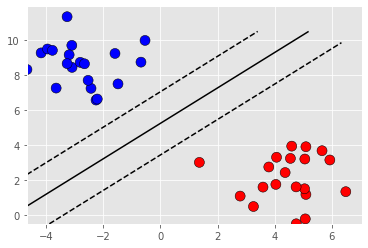

In [58]:
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

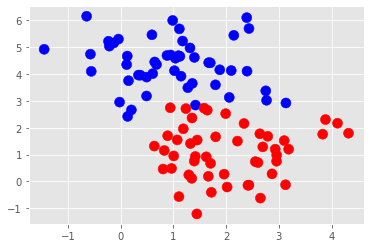

In [59]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show() 

In [60]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions


array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

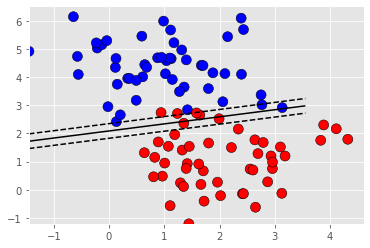

In [61]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [62]:
 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"])) 

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



#### 3. Model 3......

#### 4. Model 4......

#### 5. Model 5 ......

### IV. ANALYSIS AND EVALUATION (TEAM WORK)

### V. DEPLOYING MODEL (TEAM WORK)

### VI. CONCLUSION (TEAM WORK)